## Bootstrapping
___

Below is a poll that measures a level of support that citizens have in mayor Green (on 100 samples).

<br> 

#### General setup
___

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as ss

%matplotlib inline

<br>

#### Loading the data set
___

In [2]:
# Load the csv file
pop = pd.read_csv('../Data/grades.csv')
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   grade   100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes


In [3]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


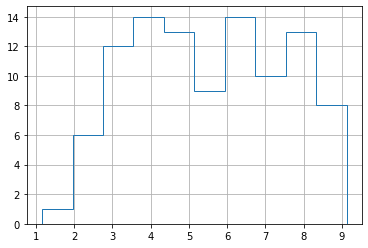

In [4]:
# Checking distribution
pop.grade.hist(histtype='step');

In [5]:
# Describe the sample with summary stats
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


Since the distribution is not a recognizable simple form but the mean for this sample is 5.5. What can be said about true mean value? Since we cannot describe the distribution we cannot simulate it. This is where bootstrapping comes in place. For this we will estimates the mean uncertainty by generating a large family of samples from the one we have and then by characterizing the distribution of the mean over this family.

<br>

#### Bootstrapping
___

Each sample in the family is formed as follow: we select grades randomly for a single existing sample allowing the same grade to be drawn more than once.

In [6]:
# Sample with replacement
pop.sample(100, replace=True).describe()

,grade
count,100.000000
mean,5.339239
std,2.034726
min,1.983167
25%,3.641594
50%,5.342877
75%,7.132170
max,8.467353


In [7]:
# Create a bootstrap of distribution of means
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100, replace=True).grade.mean() for i in range(1000)]})
bootstrap.head()

,meangrade
0,5.461298
1,5.456024
2,5.398386
3,5.523883
4,5.977231


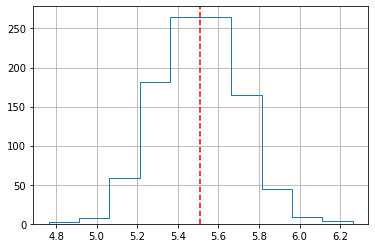

In [8]:
# Build a histogram of bootstrap means over the original mean of actual grades
bootstrap.meangrade.hist(histtype='step')
plt.axvline(pop.grade.mean(), c='r', linestyle='--');

The mean is the same, but with siginificant spread around it. 

In [9]:
# Extract the quantiles
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.11496910278873, 5.8949741925444865)

The bootstrap approximated the 95% confidence interval between 5.1 and 5.9. It appears that meangrade is slightly to be a passing one. The bootstrap procedure requires the sample that we have to be representative and under very general assumptions. 

<br>

#### How the poll data was generated
___

The distribution that was used was a sum of two normal distributions with equal weights (bimodal distribution).

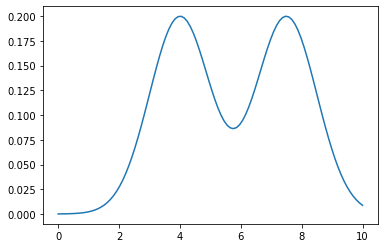

In [10]:
# Create two normal distributions 
n1 = ss.norm(7.5, 1)
n2 = ss.norm(4, 1)

# Plot the probability density
x = np.linspace(0,10,100)
plt.plot(x, 0.5*n1.pdf(x) + 0.5*n2.pdf(x));

In [11]:
def draw():
    """ Function to draw a simple grade that cannot be below 0 or above 10 """
    while True:
        # rvs returns a random sample from a distribution
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        
        # Trank the sample
        if 0 <= v <= 10:
            return v

In [12]:
def dataset(n=100):
    """ Function to create a data set by drawing samples repeteadly 100 times """
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

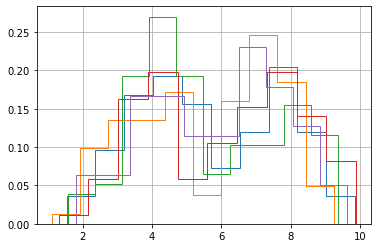

In [13]:
# Check the histogram of 5 sample data sets
[dataset().grade.hist(histtype='step', density=True) for i in range(5)];

In [14]:
# As for the sampling distribution of the mean we use a simulation
means = pd.DataFrame({'meangrade': [dataset().grade.mean() for i in range(1000)]})

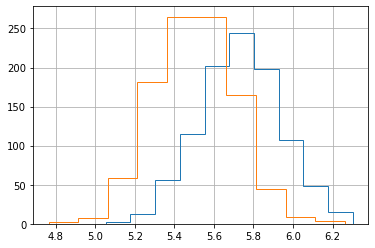

In [15]:
# Compare histograms of bootstrap and meangrade
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step');

We can see the two sampling distributions are misplaced by the spreads are comparable which justifies our confidence interval.

<br>

___
#### End.